In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

names =[
'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

In [2]:
# TODO 1: Complete the code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
                 ,header=None,delim_whitespace=True,names=names,na_values='?')

In [3]:
# TODO 2: Display the first six rows of the data frame
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [4]:
# TODO 3: What is the shape of the data? How many attributes are there? How many samples?
print("num samples={}, num attributes={}".format(df.shape[0],df.shape[1]))

num samples=506, num attributes=14


In [5]:
# TODO 4: Create a response vector y with the values in the column PRICE
y = df['PRICE'].dropna()

In [6]:
# TODO 5: Use the response vector y to find the mean house price in thousands and the fraction of homes that are above $40k.
np_y = np.array(y)
my = np.mean(np_y)
print("The mean house price is {} thousands of dollars. Only {} percent are above $40k.".format(round(my,2),round(np.mean(np_y>40),4)*100))

The mean house price is 22.53 thousands of dollars. Only 6.13 percent are above $40k.


In [7]:
# TODO 6: create a predictor vector x containing the values in the RM column
x = df['RM'].dropna()

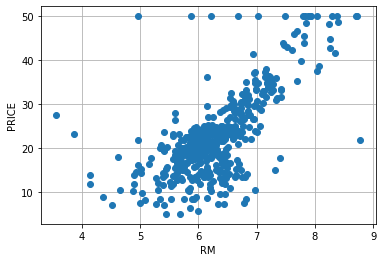

In [8]:
# TODO 7: Create a scatter plot of the price vs. the RM attribute. Make sure your plot has grid lines and label the axes with reasonable labels
np_x = np.array(x)
plt.plot(np_x,np_y,'o')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.grid(True)

In [9]:
def fit_linear(x,y):
    # TODO 8: complete the following code
    xm = np.mean(np_x)
    ym = np.mean(np_y)
    syy = np.mean((np_y-ym)**2)
    sxx = np.mean((np_x-xm)**2)
    sxy = np.mean((np_x-xm)*(np_y-ym))
    sx = np.sqrt(sxx)
    sy = np.sqrt(syy)
    beta1 = sxy / sxx
    beta0 = ym - beta1*xm
    rsq = (sxy / (sx*sy))**2
    return beta0, beta1, rsq

In [10]:
# TODO 9: print the values beta0, beta1 and rsq for the linear model of price vs. number of rooms.
beta0, beta1, rsq = fit_linear(np_x,np_y)
print("beta0:{},beta1:{},rsq:{}".format(beta0,beta1,rsq))

beta0:-34.67062077643857,beta1:9.10210898118031,rsq:0.483525455991334


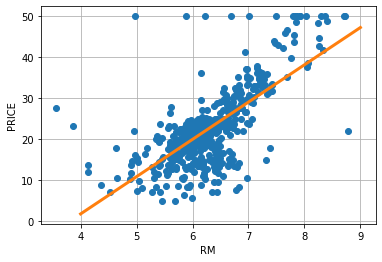

In [11]:
# TODO 10: Replot the scatter plot above, but now with the regression line.
xplt = np.array([4,9])
yplt = beta0 + beta1 * xplt
plt.plot(np_x,np_y,'o')
plt.plot(xplt,yplt,'-',linewidth=3)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.grid(True)

In [12]:
# TODO 11: compute the ^2 values for all the predictors and output the values in a table.
table = {}
for n in names:
    if n=='PRICE':
        continue
    df2 = df[n]
    np_array = np.array(df2)
    b0,b1,R = fit_linear(np_array,np_y)
    table[n] = R
print(table)

{'CRIM': 0.483525455991334, 'ZN': 0.483525455991334, 'INDUS': 0.483525455991334, 'CHAS': 0.483525455991334, 'NOX': 0.483525455991334, 'RM': 0.483525455991334, 'AGE': 0.483525455991334, 'DIS': 0.483525455991334, 'RAD': 0.483525455991334, 'TAX': 0.483525455991334, 'PTRATIO': 0.483525455991334, 'B': 0.483525455991334, 'LSTAT': 0.483525455991334}
